## Importing libraries

In [ ]:
# Agrupando por v1   = 0.70343 SCORE (76.757%)
# Agrupando por v2   = 0.70441 SCORE (76.815%)
# Agrupando por v107 = 0.69534 SCORE (76.978%)
# Agrupando por v110 = 0.67397 SCORE (76.541%)
# Agrupando por v112 = 0.70216 SCORE (76.885%)
# Agrupando por v125 = 0.68275 SCORE (76.885%)
# Agrupando por v22  = 0.70226 SCORE (76.821%)
# Agrupando por v24  = 0.62232 SCORE (76.302%)
# Agrupando por v3   = 0.70713 SCORE (76.891%)
# Agrupando por v47  = 0.68149 SCORE (76.570%)

In [1]:
import pandas as pd
import numpy as np 
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version = 0.1.463. 
             m, feats, trainm, testm = Auto_ViML(train, target, test, 
                                    sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=None,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False, 
                                    verbose=0)
            
To remove previous versions, perform 'pip uninstall autoviml'


In [2]:
url1 = '../dataset/dataset_treino.csv'
url2 = '../dataset/dataset_teste.csv'
url3 = '../dataset/sample_submission.csv'
train = pd.read_csv(url1,index_col=None)
test = pd.read_csv(url2,index_col=None)
sample_submission = pd.read_csv(url3,index_col=None)
print(train.shape,test.shape,sample_submission.shape)

(114321, 133) (114393, 132) (114393, 2)


In [3]:
from scipy.stats import mstats

# Tratando os dados outliers com Winsorize
for col in train.columns:
    if train[col].dtype !='object':
        if col in ['ID','target']:
            continue
        train[col] = mstats.winsorize(train[col], limits=[0.05, 0.05])[0]

In [4]:
train.fillna(train.mean(),inplace=True)
test.fillna(test.mean(),inplace=True)

In [6]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  114
Number of Categorical features:  19


In [8]:
# Função para criação de novas features, agrupando por algumas colunas
def ft(data):
    df = pd.DataFrame()
    
    def mean_change_of_abs_change(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    for col in numerical_feats:
        if col in ['ID','target','v107']:
            continue
        
        df[col + '_mean']   = data.groupby(['v2'])[col].mean()
        df[col + '_median'] = data.groupby(['v2'])[col].median()
        df[col + '_max']    = data.groupby(['v2'])[col].max()
        df[col + '_min']    = data.groupby(['v2'])[col].min()
        df[col + '_mean_abs_chg'] = data.groupby(['v2'])[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
        
    return df
    
new_train_ft = ft(train)
new_test_ft = ft(test)

new_train_ft = new_train_ft.reset_index()
new_test_ft = new_test_ft.reset_index()

train = pd.merge(train, new_train_ft, on='v107',how='left')
test = pd.merge(test, new_test_ft, on='v107',how='left')


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['v125'] = train['v125'].astype('category')
train['v22']  = train['v22'].astype('category')
train['v56']  = train['v56'].astype('category')

train['v107'] = train['v107'].astype('category')
train['v110'] = train['v110'].astype('category')
train['v112'] = train['v112'].astype('category')
train['v113'] = train['v113'].astype('category')
train['v24'] = train['v24'].astype('category')
train['v30'] = train['v30'].astype('category')
train['v31'] = train['v31'].astype('category')
train['v47'] = train['v47'].astype('category')
train['v52'] = train['v52'].astype('category')
train['v66'] = train['v66'].astype('category')
train['v71'] = train['v71'].astype('category')
train['v74'] = train['v74'].astype('category')
train['v75'] = train['v75'].astype('category')
train['v79'] = train['v79'].astype('category')
train['v91'] = train['v91'].astype('category')

test['v125'] = test['v125'].astype('category')
test['v22']  = test['v22'].astype('category')
test['v56']  = test['v56'].astype('category')
test['v107'] = test['v107'].astype('category')
test['v110'] = test['v110'].astype('category')
test['v112'] = test['v112'].astype('category')
test['v113'] = test['v113'].astype('category')
test['v24'] = test['v24'].astype('category')
test['v30'] = test['v30'].astype('category')
test['v31'] = test['v31'].astype('category')
test['v47'] = test['v47'].astype('category')
test['v52'] = test['v52'].astype('category')
test['v66'] = test['v66'].astype('category')
test['v71'] = test['v71'].astype('category')
test['v74'] = test['v74'].astype('category')
test['v75'] = test['v75'].astype('category')
test['v79'] = test['v79'].astype('category')
test['v91'] = test['v91'].astype('category')


train["v125"] = train["v125"].cat.codes
train["v22"]  = train["v22"].cat.codes
train["v56"]  = train["v56"].cat.codes

train['v107'] = train['v107'].cat.codes
train['v110'] = train['v110'].cat.codes
train['v112'] = train['v112'].cat.codes
train['v113'] = train['v113'].cat.codes
train['v24'] = train['v24'].cat.codes
train['v30'] = train['v30'].cat.codes
train['v31'] = train['v31'].cat.codes
train['v47'] = train['v47'].cat.codes
train['v52'] = train['v52'].cat.codes
train['v66'] = train['v66'].cat.codes
train['v71'] = train['v71'].cat.codes
train['v74'] = train['v74'].cat.codes
train['v75'] = train['v75'].cat.codes
train['v79'] = train['v79'].cat.codes
train['v91'] = train['v91'].cat.codes

test["v125"] = test["v125"].cat.codes
test["v22"]  = test["v22"].cat.codes
test["v56"]  = test["v56"].cat.codes

test['v107'] = test['v107'].cat.codes
test['v110'] = test['v110'].cat.codes
test['v112'] = test['v112'].cat.codes
test['v113'] = test['v113'].cat.codes
test['v24'] = test['v24'].cat.codes
test['v30'] = test['v30'].cat.codes
test['v31'] = test['v31'].cat.codes
test['v47'] = test['v47'].cat.codes
test['v52'] = test['v52'].cat.codes
test['v66'] = test['v66'].cat.codes
test['v71'] = test['v71'].cat.codes
test['v74'] = test['v74'].cat.codes
test['v75'] = test['v75'].cat.codes
test['v79'] = test['v79'].cat.codes
test['v91'] = test['v91'].cat.codes

In [10]:
#train_m = train_m.loc[:, (train_m != 0).any(axis=0)]
#test_m  = test_m.loc[:, (test_m != 0).any(axis=0)]

In [11]:
train.shape, test.shape

((114321, 581), (114393, 580))

In [12]:
sample_submission = ''
scoring_parameter = 'logloss'
target = 'target'

Train (Size: 114321,581) has Single_Label with target: ['target']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
     1:   87021  ->   76.1%
     0:   27300  ->   23.9%
Selecting 2-Class Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
    Target target is already numeric. No transformation done.
    Top columns in Train with missing values: ['v3', 'v131_min', 'v44_mean', 'v41_mean', 'v41_median']
         and their missing value totals: [3457, 3, 3, 3, 3]
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  18
    Number of String-Categorical Columns =  108
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Colum

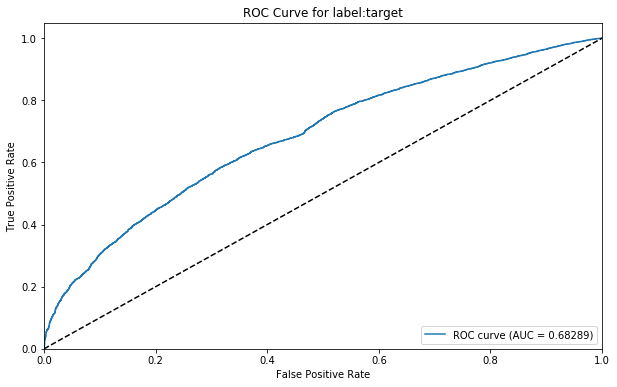

Average precision-recall score: 0.71
Macro F1 score, averaged over all classes: 0.44


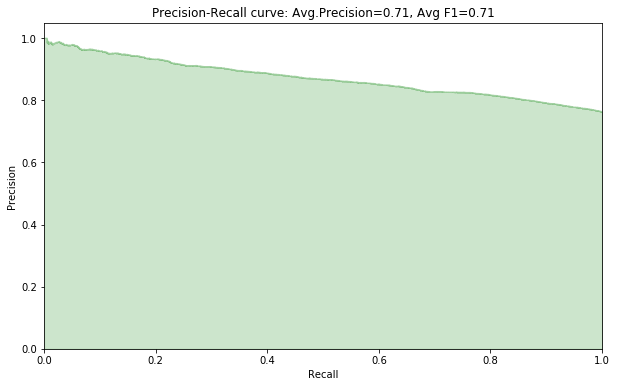

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 76.220%
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      4078
           1       0.76      1.00      0.87     13071

    accuracy                           0.76     17149
   macro avg       0.63      0.50      0.43     17149
weighted avg       0.70      0.76      0.66     17149

[[    4  4074]
 [    4 13067]]

Single Model is better than Ensembling Models for this data set.


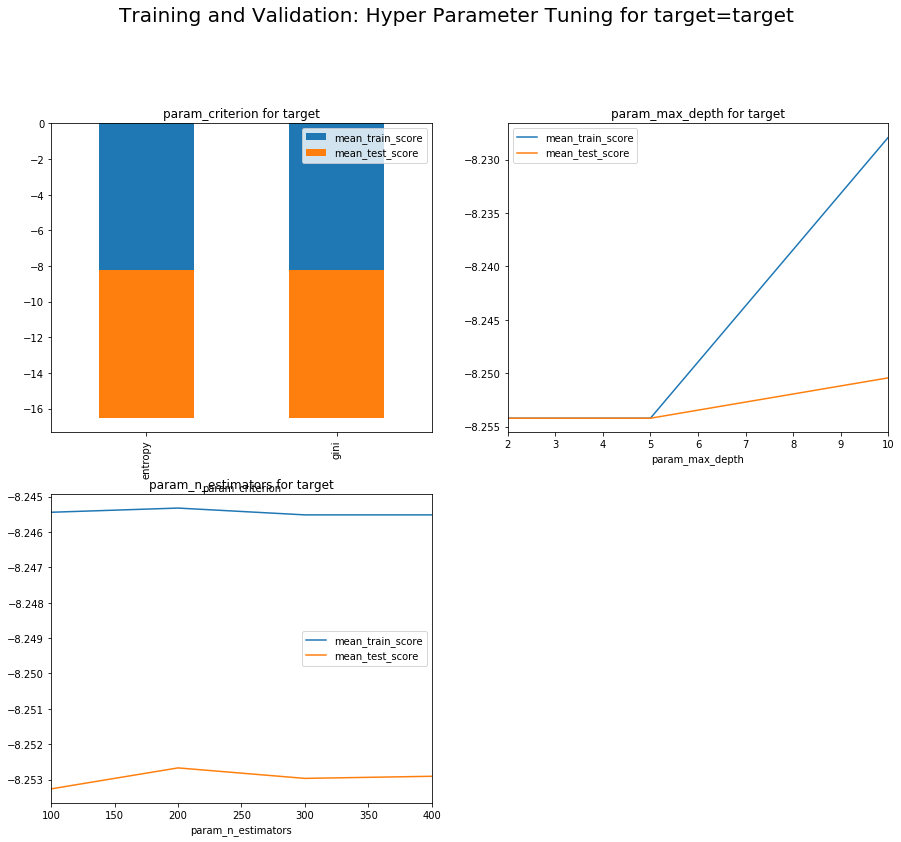

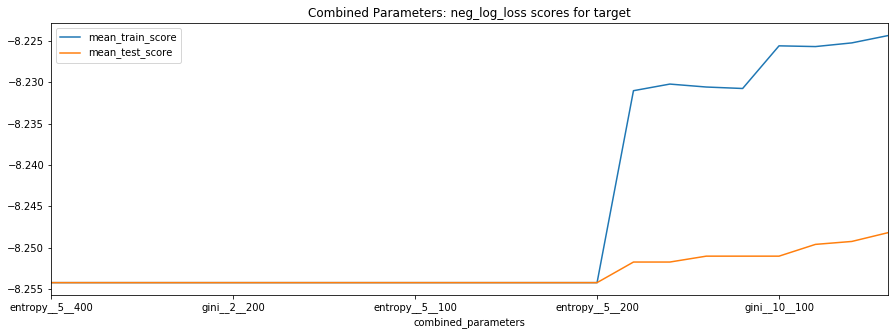

    Time taken for this Target (in seconds) = 178


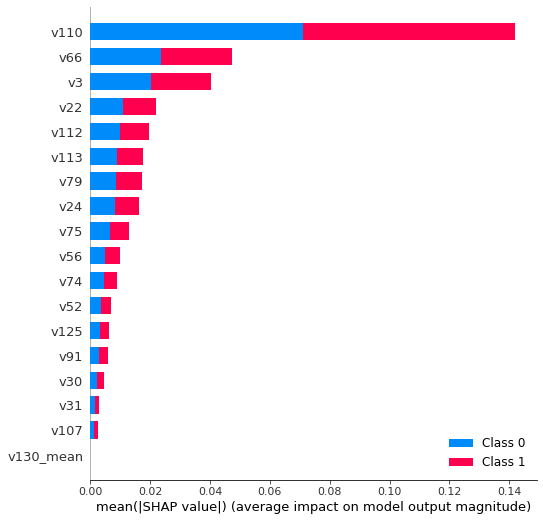

Plotting SHAP (first 10,000) values to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin

Imbalanced Class Training using Majority Class Downsampling method...
Rare Class = 0
    Pct of Rare Class in data = 23.88%
    Number of iterations for training =  1
  Rare Class Batch Size = 27300
  Majority Class Batch Size = 87021
     1. Training Batch Size = 114321
        Training Batch incident rate: 23.9%
             Batch Training completed
        Time Taken = 3 (in seconds)
Test Data predictions using Best Threshold = 0.53
    Saving predictions to ./target/target_Binary_Classification_test_modified.csv
    Saving predictions to ./target/target_Binary_Classification_submission.csv
    Saving predictions to ./target/target_Binary_Classification_train_modified.csv
Time 

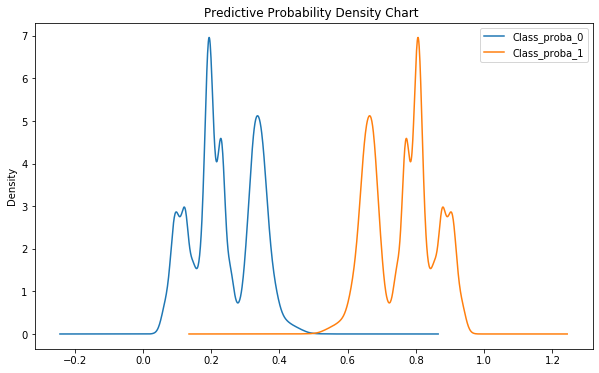

In [13]:
#### If Boosting_Flag = True => XGBoost, False=>ExtraTrees, None=>Linear Model
m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',
                                    feature_reduction=True,
                                    Boosting_Flag=False,
                                    Binning_Flag=False,
                                    Add_Poly=0, 
                                    Stacking_Flag=False,                                    
                                    Imbalanced_Flag=True, 
                                    verbose=2)